<img SRC="carro.png"/>
<center><h1 Style="color:#A9A9A9">Analisis de datos</h1></center>
<center><h5>Universidad Castro Carazo</h5></center>
<center><h6>2C - 2022</h6></center>
</br>
</br>
<p Style="text-align: justify" >Este notebook contiene el analisis de los datos de los vehiculos a la venta por parte de la empresa Pk2, esta empresa se encuentra interesada en responder una pregunta de negocio particular. ¿Como se pueden incrementar las ventas de auto de segunda mano?
Para esto se realiza un analisis del conjunto de datos faciitado por la empresa para dicho objetivo.
</br>
</br>
<a href="https://archive.ics.uci.edu/ml/datasets/Automobile">Fuente de datos para el analisis</a>

<h2>1 Carga y estandarización de los set de datos</h2></center>
</br>
<p>Que se hace en esta etapa</p>
<ol>
    <li>Importar las librerias necesarias</li>
    <li>Importar el los set de datos</li>
    <li>Revisar los encabezados de los dataframe</li>
    <li>Si solo si tenemos más de un set de datos, se unen los set de datos en un único dataframe</li>
    

<h5>1.1 Importar las librerias</h5></center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as ptl

<h5>1.2 Importar el set de datos</h5></center>

In [2]:
cols = ["symboling", "normalized", "make", "fuel", "aspiration", "doors",
"style", "wheels", "engine", "base", "length", "width", "heingt",
"curb", "engineType", "Cylinders", "engine-size", "system", "bore", "stroke",
"compression", "horsepower", "peak", "City", "Higway", "price"]

df_1er_autos = pd.read_csv("autos.csv", names=cols)
df_2do_autos = pd.read_csv("Autos 1.csv", names=cols)

In [3]:
df_1er_autos

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,0,?,volkswagen,diesel,turbo,four,sedan,fwd,front,100.4,...,97,idi,3.01,3.40,23.0,68,4500,33,38,13845
193,0,?,volkswagen,gas,std,four,wagon,fwd,front,100.4,...,109,mpfi,3.19,3.40,9.0,88,5500,25,31,12290
194,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,12940
195,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,13415


In [4]:
df_1er_autos.shape

(197, 26)

In [5]:
df_2do_autos.shape

(29, 26)

In [6]:
df_1er_autos.head(5)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [7]:
df_1er_autos.tail(5)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
192,0,?,volkswagen,diesel,turbo,four,sedan,fwd,front,100.4,...,97,idi,3.01,3.40,23.0,68,4500,33,38,13845
193,0,?,volkswagen,gas,std,four,wagon,fwd,front,100.4,...,109,mpfi,3.19,3.40,9.0,88,5500,25,31,12290
194,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,12940
195,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,13415
196,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,15985


In [8]:
df_1er_autos.describe()

,symboling,base,length,width,heingt,curb,engine-size,compression,City,Higway
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000
mean,0.913706,98.409645,173.450254,65.812690,53.628934,2534.796954,126.263959,10.128020,25.416244,30.984772
std,1.202746,5.866965,12.213912,2.128306,2.438891,520.401159,42.282594,3.934467,6.566717,6.908644
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.000000,52.000000,2140.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,96.500000,172.600000,65.400000,53.900000,2405.000000,110.000000,9.000000,25.000000,30.000000
75%,2.000000,100.400000,178.500000,66.500000,55.500000,2844.000000,141.000000,9.400000,30.000000,36.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


<h5>1.3 Revisar encabezados de los set de datos </h5></center>

In [9]:
df_1er_autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symboling    197 non-null    int64  
 1   normalized   197 non-null    object 
 2   make         197 non-null    object 
 3   fuel         197 non-null    object 
 4   aspiration   197 non-null    object 
 5   doors        197 non-null    object 
 6   style        197 non-null    object 
 7   wheels       197 non-null    object 
 8   engine       197 non-null    object 
 9   base         197 non-null    float64
 10  length       197 non-null    float64
 11  width        197 non-null    float64
 12  heingt       197 non-null    float64
 13  curb         197 non-null    int64  
 14  engineType   197 non-null    object 
 15  Cylinders    197 non-null    object 
 16  engine-size  197 non-null    int64  
 17  system       197 non-null    object 
 18  bore         197 non-null    object 
 19  stroke  

In [10]:
df_1er_autos.columns

Index(['symboling', 'normalized', 'make', 'fuel', 'aspiration', 'doors',
       'style', 'wheels', 'engine', 'base', 'length', 'width', 'heingt',
       'curb', 'engineType', 'Cylinders', 'engine-size', 'system', 'bore',
       'stroke', 'compression', 'horsepower', 'peak', 'City', 'Higway',
       'price'],
      dtype='object')

In [11]:
df_2do_autos.columns

Index(['symboling', 'normalized', 'make', 'fuel', 'aspiration', 'doors',
       'style', 'wheels', 'engine', 'base', 'length', 'width', 'heingt',
       'curb', 'engineType', 'Cylinders', 'engine-size', 'system', 'bore',
       'stroke', 'compression', 'horsepower', 'peak', 'City', 'Higway',
       'price'],
      dtype='object')

<h5>1.4 Unir archivos en un solo dataframe </h5></center>

In [12]:
unionArchivos = [df_1er_autos,df_2do_autos]
dfAutos = pd.concat(unionArchivos)
dfAutos.shape

(226, 26)

In [13]:
dfAutos.head(3)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


In [14]:
dftem = dfAutos.iloc[:,0:2]

In [15]:
dftem.head(6)

,symboling,normalized
0,3,?
1,3,?
2,1,?
3,2,164
4,2,164
5,2,?


In [16]:
dftem = dfAutos.iloc[[0,3,6,24],[0,5,6]]

In [17]:
dftem

,symboling,doors,style
0,3,two,convertible
3,2,four,sedan
6,1,four,sedan
24,1,four,hatchback


In [18]:
df_Autos = dfAutos

In [19]:
df_Autos.shape

(226, 26)

<h2 Style="color:#1E90FF">2. Manejo de valores faltantes</h2>
<p>Que se hace en esta etapa?</p>
<ol>
    <li>Identificar como se muestran los valores faltantes(null, espacio vacio, ?) y estandarizarlos a (NaN)</li>
    <li>Contar la cantidad de valores NaN faltantes por variable(columna)</li>
    <li>Analisis de imputación (el promedio / ML) para el caso de los numericos</li>
    <li>Analisis de imputación (con el valor mas frecuente/ ML) para el caso de los caracteres</li>
    <li>Eliminar filas o columas con valores faltantes</li>
</ol>
<h3 Style="color:#2F0F9F">2.1 Identificar como se muestran los valores faltantes y estandarizarlos</h3>

In [20]:
df_Autos.replace("?", np.nan, inplace = True)
df_Autos.head(10)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,NaN


<h5 Style="color:#483d8b">2.2 Contar valores faltantes por columna</h5>

In [21]:
valoresPerdidos = df_Autos.isnull()

In [22]:
valoresPerdidos.head(5)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [23]:
for column in valoresPerdidos.columns.values.tolist() :
    print (column)
    print (valoresPerdidos[column].value_counts())
    print ("")

symboling
False    226
Name: symboling, dtype: int64

normalized
False    180
True      46
Name: normalized, dtype: int64

make
False    226
Name: make, dtype: int64

fuel
False    226
Name: fuel, dtype: int64

aspiration
False    226
Name: aspiration, dtype: int64

doors
False    224
True       2
Name: doors, dtype: int64

style
False    226
Name: style, dtype: int64

wheels
False    226
Name: wheels, dtype: int64

engine
False    226
Name: engine, dtype: int64

base
False    226
Name: base, dtype: int64

length
False    226
Name: length, dtype: int64

width
False    226
Name: width, dtype: int64

heingt
False    226
Name: heingt, dtype: int64

curb
False    226
Name: curb, dtype: int64

engineType
False    226
Name: engineType, dtype: int64

Cylinders
False    226
Name: Cylinders, dtype: int64

engine-size
False    226
Name: engine-size, dtype: int64

system
False    226
Name: system, dtype: int64

bore
False    222
True       4
Name: bore, dtype: int64

stroke
False    222
True     

<h5 Style="color:#483d8b">2.3 Imputar datos numericos</h5>

In [24]:
avg_normalized = df_Autos["normalized"].astype("float").mean(axis=0)
print ("la media del normalized: ", avg_normalized)

la media del normalized:  122.28333333333333


In [25]:
df_Autos["normalized"].replace(np.nan, 122, inplace=True)
df_Autos.head(3)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


In [26]:
avg_price = df_Autos["price"].astype("float").mean(axis=0)
print ("la media del price: ", avg_price)

la media del price:  12780.941441441442


In [27]:
df_Autos["price"].replace(np.nan, 12781, inplace=True)
df_Autos.head(10)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,122,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,122,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,12781


<h3 Style="color:#483d8b">2.4 Imputar datos tipo caracter </h3></center>

In [28]:
df_Autos["doors"].value_counts()

four    124
two     100
Name: doors, dtype: int64

In [29]:
df_Autos["doors"].value_counts().idxmax()

'four'

In [30]:
df_Autos["doors"].replace(np.nan, "four", inplace=True)

In [31]:
valoresPerdidos=df_Autos.isnull()
for column in valoresPerdidos.columns.values.tolist() :
    print (column)
    print (valoresPerdidos[column].value_counts())
    print ("")

symboling
False    226
Name: symboling, dtype: int64

normalized
False    226
Name: normalized, dtype: int64

make
False    226
Name: make, dtype: int64

fuel
False    226
Name: fuel, dtype: int64

aspiration
False    226
Name: aspiration, dtype: int64

doors
False    226
Name: doors, dtype: int64

style
False    226
Name: style, dtype: int64

wheels
False    226
Name: wheels, dtype: int64

engine
False    226
Name: engine, dtype: int64

base
False    226
Name: base, dtype: int64

length
False    226
Name: length, dtype: int64

width
False    226
Name: width, dtype: int64

heingt
False    226
Name: heingt, dtype: int64

curb
False    226
Name: curb, dtype: int64

engineType
False    226
Name: engineType, dtype: int64

Cylinders
False    226
Name: Cylinders, dtype: int64

engine-size
False    226
Name: engine-size, dtype: int64

system
False    226
Name: system, dtype: int64

bore
False    222
True       4
Name: bore, dtype: int64

stroke
False    222
True       4
Name: stroke, dtype: i

<h3 Style="color:#583d8b">2.5 Eliminar filas con valores faltantes </h3></center>

In [32]:
df_Autos.dropna(subset = ["peak"], axis = 0, inplace=True)      #0 filas 1 columnas
df_Autos.reset_index(drop=True, inplace=True)


In [33]:
df_Autos.dropna(subset = ["bore"], axis = 0, inplace=True)      #0 filas 1 columnas
df_Autos.reset_index(drop=True, inplace=True)


In [34]:
df_Autos.dropna(subset = ["stroke"], axis = 0, inplace=True)      #0 filas 1 columnas
df_Autos.reset_index(drop=True, inplace=True)


In [35]:
df_Autos.dropna(subset = ["horsepower"], axis = 0, inplace=True)      #0 filas 1 columnas
df_Autos.reset_index(drop=True, inplace=True)


In [36]:
valoresPerdidos=df_Autos.isnull()
for column in valoresPerdidos.columns.values.tolist() :
    print (column)
    print (valoresPerdidos[column].value_counts())
    print ("")

symboling
False    220
Name: symboling, dtype: int64

normalized
False    220
Name: normalized, dtype: int64

make
False    220
Name: make, dtype: int64

fuel
False    220
Name: fuel, dtype: int64

aspiration
False    220
Name: aspiration, dtype: int64

doors
False    220
Name: doors, dtype: int64

style
False    220
Name: style, dtype: int64

wheels
False    220
Name: wheels, dtype: int64

engine
False    220
Name: engine, dtype: int64

base
False    220
Name: base, dtype: int64

length
False    220
Name: length, dtype: int64

width
False    220
Name: width, dtype: int64

heingt
False    220
Name: heingt, dtype: int64

curb
False    220
Name: curb, dtype: int64

engineType
False    220
Name: engineType, dtype: int64

Cylinders
False    220
Name: Cylinders, dtype: int64

engine-size
False    220
Name: engine-size, dtype: int64

system
False    220
Name: system, dtype: int64

bore
False    220
Name: bore, dtype: int64

stroke
False    220
Name: stroke, dtype: int64

compression
False   

In [37]:
df_Autos

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,0,122,volkswagen,diesel,turbo,four,sedan,fwd,front,100.4,...,97,idi,3.01,3.4,23.0,68,4500,33,38,13845
216,0,122,volkswagen,gas,std,four,wagon,fwd,front,100.4,...,109,mpfi,3.19,3.4,9.0,88,5500,25,31,12290
217,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,12940
218,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,13415


<h2 Style="color:#DAA520">3. Estandarizacion de datos</h2>
<p>Que se hace en esta etapa?</p>
<ol>
    <li>Verificar el dominio de las variables y se ajusta, si es necesario</li>
    <li>Convertir valores en función de la interpretación</li>
    <li>Normalizar datos para que sus valores queden entre cero y uno</li>
    <li>Agrupar datos (Binning)</li>
    <li>Eliminar filas o columas con valores faltantes</li>
</ol>
<h3 Style="color:#2F0F9F">3.1 Verificar el dominio de las variables</h3>

In [38]:
df_Autos.dtypes

symboling        int64
normalized      object
make            object
fuel            object
aspiration      object
doors           object
style           object
wheels          object
engine          object
base           float64
length         float64
width          float64
heingt         float64
curb             int64
engineType      object
Cylinders       object
engine-size      int64
system          object
bore            object
stroke          object
compression    float64
horsepower      object
peak            object
City             int64
Higway           int64
price           object
dtype: object

In [39]:
df_Autos[["normalized","peak"]]=df_Autos[["normalized","peak"]].astype("int")
df_Autos[["bore","stroke","price"]]=df_Autos[["bore","stroke","price"]].astype("float")

In [40]:
df_Autos.dtypes

symboling        int64
normalized       int32
make            object
fuel            object
aspiration      object
doors           object
style           object
wheels          object
engine          object
base           float64
length         float64
width          float64
heingt         float64
curb             int64
engineType      object
Cylinders       object
engine-size      int64
system          object
bore           float64
stroke         float64
compression    float64
horsepower      object
peak             int32
City             int64
Higway           int64
price          float64
dtype: object

<h3 Style="color:#483d8b">3.2 Convertir valores en función de su interpretación </h3>

In [41]:
df_Autos.head(5)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [42]:
df_Autos["city-L/100km"]=235/df_Autos["City"]
df_Autos.head(5)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,system,bore,stroke,compression,horsepower,peak,City,Higway,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,13.055556


In [43]:
df_Autos["Hihway-L/100km"] = 235/df_Autos["Higway"]
df_Autos.head(5)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,bore,stroke,compression,horsepower,peak,City,Higway,price,city-L/100km,Hihway-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,11.190476,8.703704
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,11.190476,8.703704
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,12.368421,9.038462
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,9.791667,7.833333
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,13.055556,10.681818


<h3 Style="color:#483d1b">3.3 Normalización de datos </h3>

In [44]:
df_Autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   symboling       220 non-null    int64  
 1   normalized      220 non-null    int32  
 2   make            220 non-null    object 
 3   fuel            220 non-null    object 
 4   aspiration      220 non-null    object 
 5   doors           220 non-null    object 
 6   style           220 non-null    object 
 7   wheels          220 non-null    object 
 8   engine          220 non-null    object 
 9   base            220 non-null    float64
 10  length          220 non-null    float64
 11  width           220 non-null    float64
 12  heingt          220 non-null    float64
 13  curb            220 non-null    int64  
 14  engineType      220 non-null    object 
 15  Cylinders       220 non-null    object 
 16  engine-size     220 non-null    int64  
 17  system          220 non-null    obj

In [45]:
dfTemp = df_Autos[["length","width","heingt"]]
dfTemp.head(5)

,length,width,heingt
0,168.8,64.1,48.8
1,168.8,64.1,48.8
2,171.2,65.5,52.4
3,176.6,66.2,54.3
4,176.6,66.4,54.3


In [46]:
df_Autos["length"]=df_Autos["length"]/df_Autos["length"].max()
df_Autos["width"]=df_Autos["width"]/df_Autos["width"].max()
df_Autos["heingt"]=df_Autos["heingt"]/df_Autos["heingt"].max()

In [47]:
dfTemp = df_Autos[["length","width","heingt"]]
dfTemp.head(5)

,length,width,heingt
0,0.811148,0.886584,0.816054
1,0.811148,0.886584,0.816054
2,0.822681,0.905947,0.876254
3,0.848630,0.915629,0.908027
4,0.848630,0.918396,0.908027


<h3 Style="color:#403d7b">3.4 Binning </h3>

In [48]:
df_Autos.head(5)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,bore,stroke,compression,horsepower,peak,City,Higway,price,city-L/100km,Hihway-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,11.190476,8.703704
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,11.190476,8.703704
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,12.368421,9.038462
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,9.791667,7.833333
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,13.055556,10.681818


In [49]:
df_Autos[["horsepower"]]=df_Autos[["horsepower"]].astype("int")
df_Autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   symboling       220 non-null    int64  
 1   normalized      220 non-null    int32  
 2   make            220 non-null    object 
 3   fuel            220 non-null    object 
 4   aspiration      220 non-null    object 
 5   doors           220 non-null    object 
 6   style           220 non-null    object 
 7   wheels          220 non-null    object 
 8   engine          220 non-null    object 
 9   base            220 non-null    float64
 10  length          220 non-null    float64
 11  width           220 non-null    float64
 12  heingt          220 non-null    float64
 13  curb            220 non-null    int64  
 14  engineType      220 non-null    object 
 15  Cylinders       220 non-null    object 
 16  engine-size     220 non-null    int64  
 17  system          220 non-null    obj

In [50]:
cat=np.linspace(min(df_Autos["horsepower"]),max(df_Autos["horsepower"]),4)
cat

array([ 48., 128., 208., 288.])

In [51]:
nombres = ["bajo","medio","alto"]
df_Autos["horsepower-bins"] = pd.cut(df_Autos["horsepower"], bins = cat , labels = nombres, include_lowest=True)
df_Autos[["horsepower","horsepower-bins"]].head()

,horsepower,horsepower-bins
0,111,bajo
1,111,bajo
2,154,medio
3,102,bajo
4,115,bajo


In [52]:
df_Autos["horsepower-bins"].value_counts()

bajo     179
medio     39
alto       2
Name: horsepower-bins, dtype: int64

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt

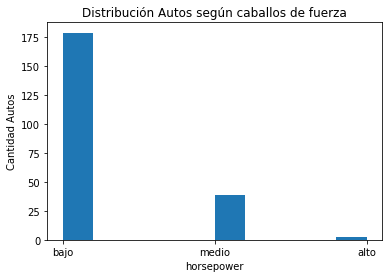

In [54]:
plt.hist(df_Autos["horsepower-bins"])
plt.xlabel("horsepower")
plt.ylabel("Cantidad Autos")
plt.title("Distribución Autos según caballos de fuerza")
plt.show()

In [55]:
df_Autos.head(10)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,stroke,compression,horsepower,peak,City,Higway,price,city-L/100km,Hihway-L/100km,horsepower-bins
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000,21,27,13495.0,11.190476,8.703704,bajo
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000,21,27,16500.0,11.190476,8.703704,bajo
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,3.47,9.0,154,5000,19,26,16500.0,12.368421,9.038462,medio
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.40,10.0,102,5500,24,30,13950.0,9.791667,7.833333,bajo
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.40,8.0,115,5500,18,22,17450.0,13.055556,10.681818,bajo
5,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,3.40,8.5,110,5500,19,25,15250.0,12.368421,9.400000,bajo
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,3.40,8.5,110,5500,19,25,17710.0,12.368421,9.400000,bajo
7,1,122,audi,gas,std,four,wagon,fwd,front,105.8,...,3.40,8.5,110,5500,19,25,18920.0,12.368421,9.400000,bajo
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,3.40,8.3,140,5500,17,20,23875.0,13.823529,11.750000,medio
9,0,122,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,3.40,7.0,160,5500,16,22,12781.0,14.687500,10.681818,medio


<h2 Style="color:#AAA520">4. Visualización de datos</h2>
<p>Que se hace en esta etapa?</p>
<ol>
    <li>Responder las preguntas de negocio</li>
    <li>Liberar conocimiento</li>
    <li>Generar informe de negocio</li>
    
</ol>

In [56]:
gf1= df_Autos.groupby(["horsepower-bins"]).count()
gf1

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,bore,stroke,compression,horsepower,peak,City,Higway,price,city-L/100km,Hihway-L/100km
horsepower-bins,,,,,,,,,,,,,,,,,,,,,
bajo,179,179,179,179,179,179,179,179,179,179,...,179,179,179,179,179,179,179,179,179,179
medio,39,39,39,39,39,39,39,39,39,39,...,39,39,39,39,39,39,39,39,39,39
alto,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


In [57]:
gf1= df_Autos.groupby(["horsepower-bins"]).count()
gf1= gf1.iloc[:,:1]
gf1

,symboling
horsepower-bins,
bajo,179
medio,39
alto,2


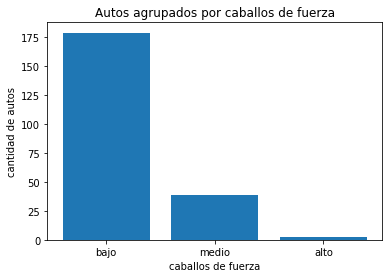

<Figure size 720x2880 with 0 Axes>

In [58]:
eje_x=("bajo","medio","alto")
eje_y= gf1["symboling"].tolist()
#Creamos la gráfica
plt.bar(eje_x,eje_y)
#leyenda en los ejes
plt.ylabel("cantidad de autos")
plt.xlabel("caballos de fuerza")
plt.title("Autos agrupados por caballos de fuerza")
#tamaño del gráfico
plt.figure(figsize=(10,40))
plt.show()

In [59]:
gf2=df_Autos.groupby(["make"]).count()
gf2=gf2.iloc[:,:1]
#gf2 = gf2.sort_values('symboling') ordenar
gf2

,symboling
make,
alfa-romero,3
audi,7
bmw,8
chevrolet,3
dodge,9
honda,13
isuzu,4
jaguar,3
mazda,13


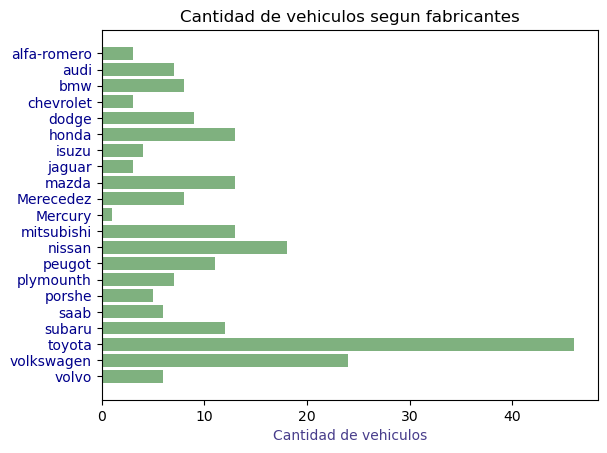

In [60]:
eje_x = ("alfa-romero", "audi", "bmw","chevrolet", "dodge", "honda", "isuzu", "jaguar", "mazda", "Merecedez", "Mercury",
        "mitsubishi", "nissan", "peugot", "plymounth", "porshe", "saab", "subaru", "toyota", "volkswagen", "volvo")
eje_y = gf2["symboling"].tolist()

plt.rcdefaults()
fig, ax = plt.subplots()

# Este se alimenta de la lista denominada eje_x

y_pos = np.arange(len(eje_x))

#alpha es grado de transparencia de barras

ax.barh(y_pos, eje_y, align="center", color="#006400", alpha=0.5) 
ax.set_yticks(y_pos, labels=eje_x, color="#00008B")
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel("Cantidad de vehiculos").set_color("#483D8B")
ax.set_title("Cantidad de vehiculos segun fabricantes")
    
plt.show()

In [61]:
df_Autos.head(2)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,stroke,compression,horsepower,peak,City,Higway,price,city-L/100km,Hihway-L/100km,horsepower-bins
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000,21,27,13495.0,11.190476,8.703704,bajo
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000,21,27,16500.0,11.190476,8.703704,bajo


In [62]:
gf3=df_Autos.groupby(["doors"]).count()
gf3=gf3.iloc[:,:1]
gf3

,symboling
doors,
four,125
two,95


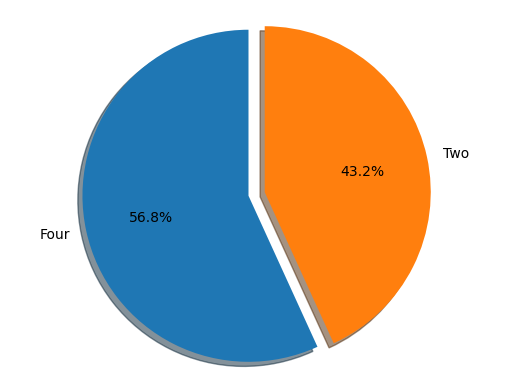

In [63]:
etiqueta="Four","Two"
sizes= gf3["symboling"].tolist()

separacion=(0,0.1)

figl,axl=plt.subplots()
axl.pie(sizes,explode=separacion,labels=etiqueta,autopct="%1.1f%%",shadow=True,startangle=90)
axl.axis("equal")  #forma de circulo 

plt.show()

In [64]:
gf4=df_Autos.groupby(["style"]).count()
gf4=gf4.iloc[:,:1]
gf4

,symboling
style,
convertible,8
hardtop,10
hatchback,72
sedan,105
wagon,25


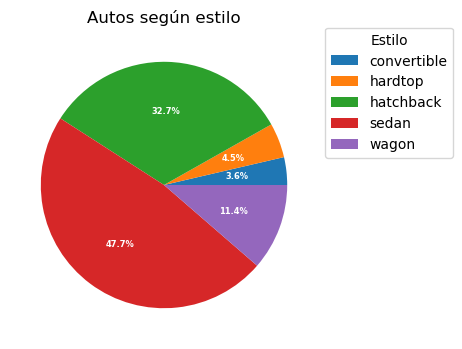

In [65]:
fig, ax=plt.subplots(figsize=(8,4), subplot_kw=dict(aspect="equal"))
data=gf4["symboling"].tolist()
estilo=["convertible","hardtop","hatchback","sedan","wagon"]

def func(pct, allvals):
    absolute=int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%".format(pct, absolute)

wedges,texts,autotexts=ax.pie(data,autopct=lambda pct: func(pct,data), textprops=dict(color="w"))


ax.legend(wedges, estilo,
          title="Estilo",
          loc="center left",
          bbox_to_anchor=(1,0,0.5,1.6))
plt.setp(autotexts, size=6, weight="bold")
ax.set_title("Autos según estilo")
plt.show()

In [66]:
import matplotlib.pyplot as plt
import numpy as np

In [68]:
gf4=df_Autos.groupby(["style"]).count()
gf4=gf4.iloc[:,:1]
gf4

,symboling
style,
convertible,8
hardtop,10
hatchback,72
sedan,105
wagon,25


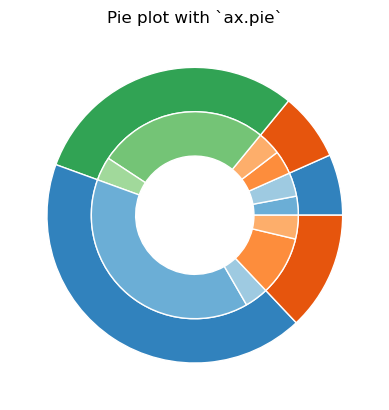

In [108]:
fig, ax = plt.subplots()

data=gf4["symboling"].tolist()         #no lo usé
estilo=["convertible","hardtop","hatchback","sedan","wagon"]   #no lo usé

size = 0.3
vals = np.array([[ 8.,10.], [ 10.,10.], [ 72.,10.], [ 105.,10.], [ 25.,10.]])

cmap = plt.colormaps["tab20c"]         #es solo tabla de colores
outer_colors = cmap(np.arange(3)*4)     #colores
inner_colors = cmap([1, 2, 5, 6, 9, 10])

ax.pie(vals.sum(axis=1), radius=1, colors=outer_colors,   #pie externo
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(vals.flatten(), radius=1-size, colors=inner_colors,   #pie interno
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Pie plot with `ax.pie`')
plt.show()             #este gráfico no funcionó

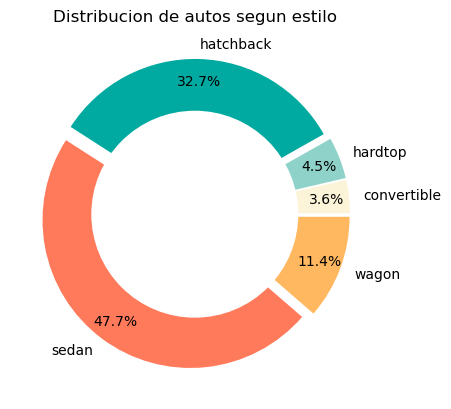

In [102]:
# Colores
colors = ['#FCF4D9', '#8ED2C9', '#00AAA0', 
          '#FF7A5A', '#FFB85F']
 
# Separaciones
explode = (0.05, 0.05, 0.05, 0.05, 0.05)

# Creacion de grafica circular
plt.pie(data, colors=colors, labels=estilo,
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode)

# dibujo de circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

# Esta linea agrega el cirulo blanco sobre la grafica
fig.gca().add_artist(centre_circle)

plt.title('Distribucion de autos segun estilo')

# Displaing Chart
plt.show()

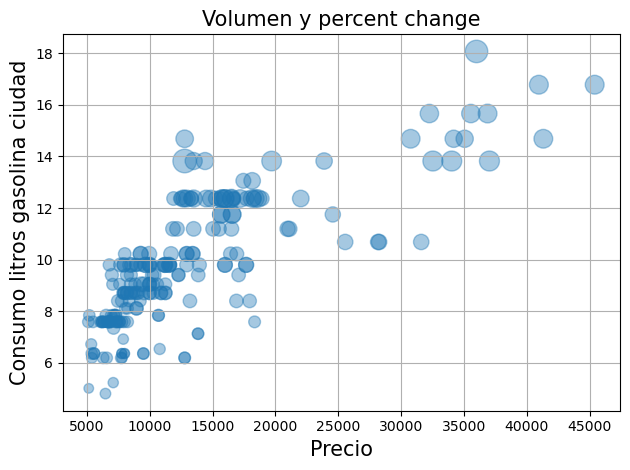

In [111]:
import matplotlib.cbook as cbook

fig, ax= plt.subplots()
ax.scatter(df_Autos["price"],df_Autos["city-L/100km"], s=df_Autos["horsepower"], alpha=0.4)

ax.set_xlabel("Precio", fontsize=15)
ax.set_ylabel("Consumo litros gasolina ciudad", fontsize=15)
ax.set_title("Volumen y percent change", fontsize=15)

ax.grid(True)
fig.tight_layout()

plt.show()
